# Distribution Plots


In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


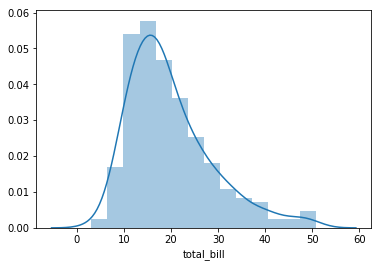

In [6]:
#univariate distribution plot of total bill. #kernel density distribution and histogram
sns.distplot(tips['total_bill'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


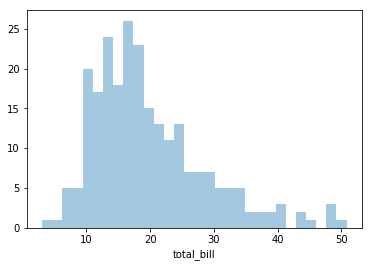

In [8]:
sns.distplot(tips['total_bill'],kde=False, bins=30) #I'm turning off the kde to see just the distribution of bills

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


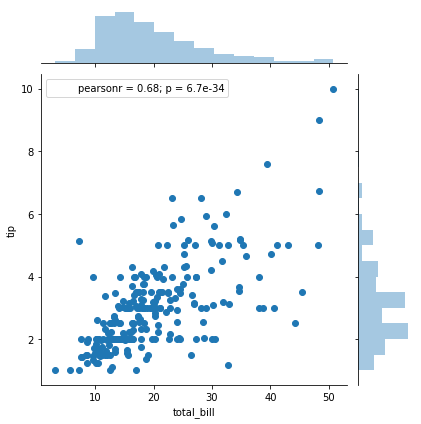

In [9]:
#joint plot allows me to combine two different distribution plots. Can easily see relationship between bill total and size of tip
sns.jointplot(x='total_bill',y='tip',data=tips)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


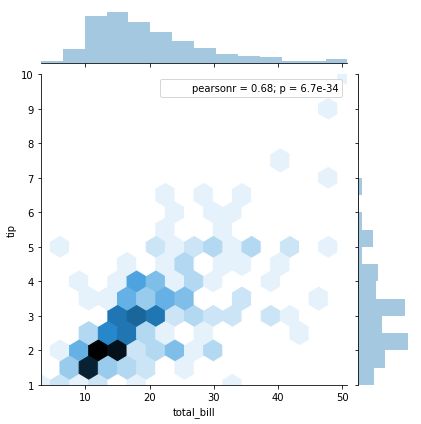

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex') #changing the default type of plot

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


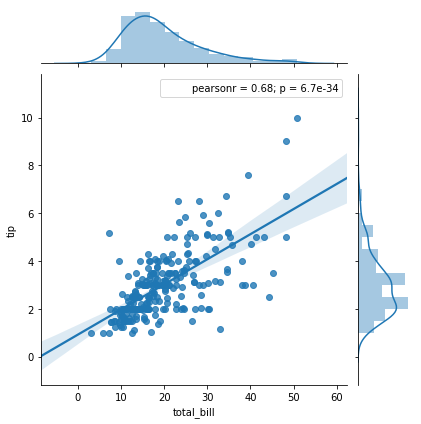

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg') # Implementing a linear fit to scatter point data

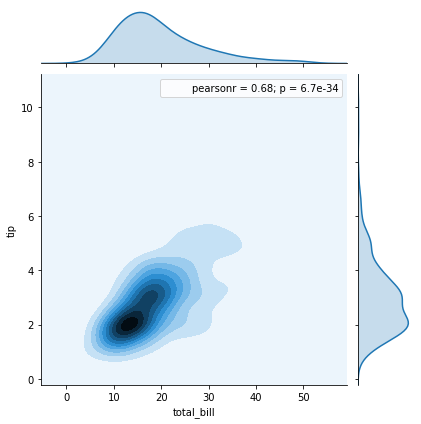

In [13]:
#density plot of where the x and y line up the most
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

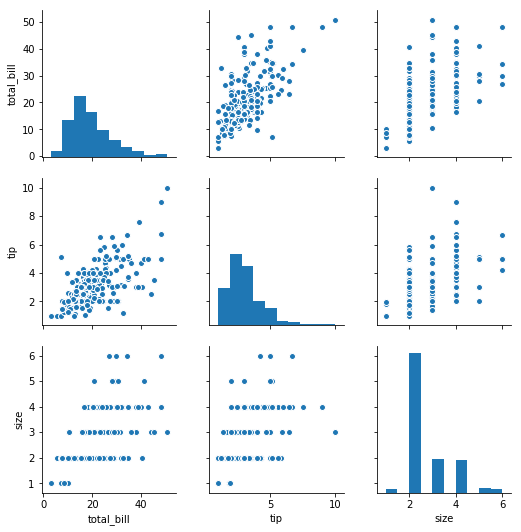

In [14]:
sns.pairplot(tips) #all numerical columns being shown.Nice way to quickly visualize my data.

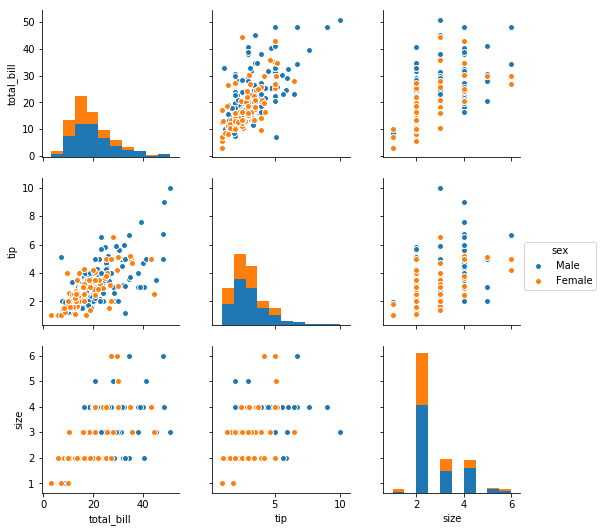

In [15]:
sns.pairplot(tips, hue='sex') #color based on my column of interest i.e. hue

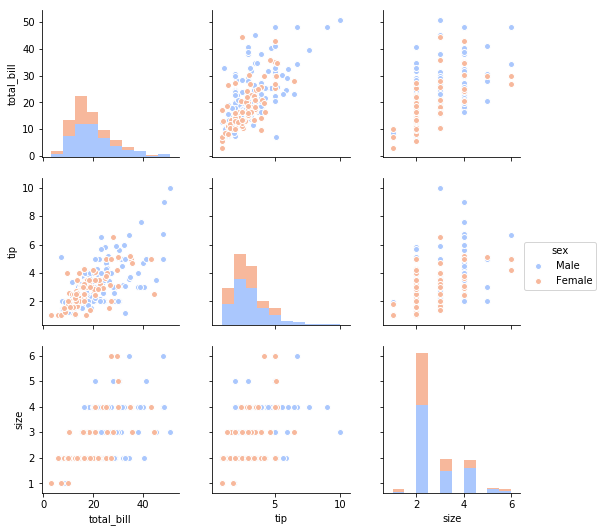

In [16]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

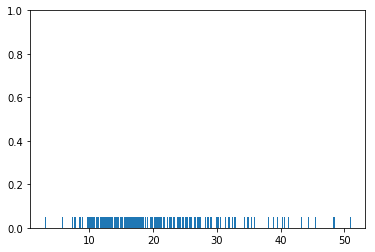

In [17]:
sns.rugplot(tips['total_bill']) #instead of a histogram that has bins and plots counts of bin, there is a dashmark for every single point in distribution

In [23]:
#creating a kernel density estimation plot
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

(0, 1)

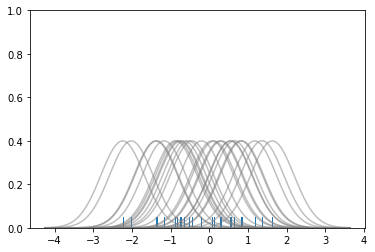

In [24]:
dataset= np.random.randn(25) #create dataset
sns.rugplot(dataset); #Create another rugplot
x_min=dataset.min() - 2 # Set up the x-axis for the plot
x_max=dataset.max() + 2
x_axis = np.linspace(x_min,x_max,100) # 100 equally spaced points from x_min to x_max
# set up the bandwidth for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2
kernel_list=[] # Create an empty kernel list
# Plot each basis function
for data_point in dataset:
    #create a kernel for each point and append to list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel *.4
    plt.plot(x_axis, kernel, color = 'grey', alpha=0.5)
    
plt.ylim(0,1)


Text(0.5,0.98,'Sum of the Basis Functions')

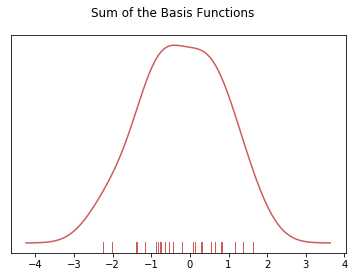

In [30]:
#Normal distributions centered around blue dashes. Need to sum them all up
sum_of_kde = np.sum(kernel_list, axis=0) #plot the sum of the basis function
fig = plt.plot(x_axis, sum_of_kde,color='indianred') #plot figure
sns.rugplot(dataset,c='indianred') # add the initial rugplot
plt.yticks([]) #Get rid of y-tick marks
plt.suptitle("Sum of the Basis Functions") #set title


In [31]:
#KDE plot we wanted to create from dist plot

In [32]:
#recap:Dist plot - with or without KDE, Jointplot, Pairplot-jointplot for every single column in df, rugplot-build logic of KDE plot

# Categorical Plots

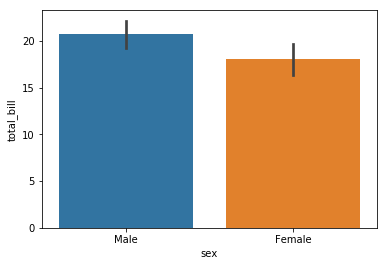

In [33]:
#concerned about distributions of categorical columns in reference to numerical columns or other categorical column.
sns.barplot(x='sex',y='total_bill',data=tips)

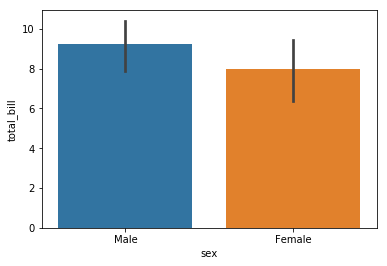

In [35]:
#let's change estimator object to affect aggregation of our plot. Let's focus on standard deviation by calling it from a numpy package
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
#we get a visualization of some groupy by measure

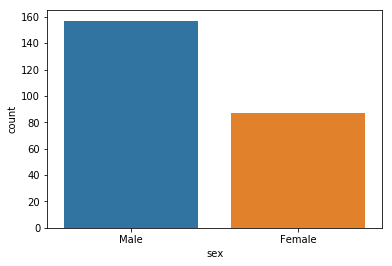

In [36]:
#count plot, estimator is counting number of occurrances. We are only concerned with the x variable with countplot.
sns.countplot(x='sex', data=tips)

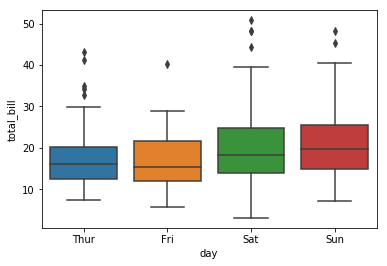

In [39]:
#show distribution of categorical data - e.g. boxplots and violin plots
sns.boxplot(x='day',y='total_bill',data=tips)

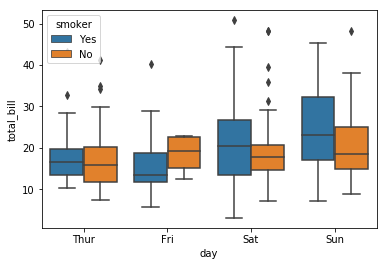

In [40]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker') #adding finer detail

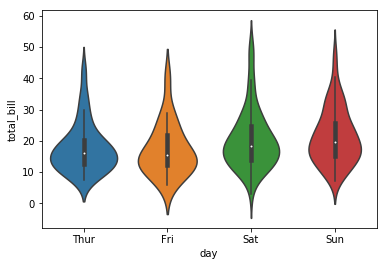

In [41]:
#violin plot similar to box plot.shows distribution across some category. Harder to interpret than boxplot
#allows us to plot all components corresponding to data points. Shows kernel density estimation of underlying distribution. 
#Shows distribution of data points on the side.
sns.violinplot(x='day', y='total_bill',data=tips)

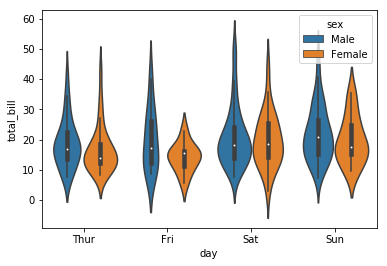

In [42]:
#can also specify by hue
sns.violinplot(x='day', y='total_bill',data=tips,hue='sex')

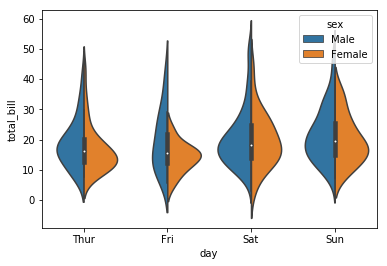

In [43]:
#can split distributions based on another category as well
#can use with data saavy folks but avoid using this with management types
sns.violinplot(x='day', y='total_bill',data=tips,hue='sex',split=True)

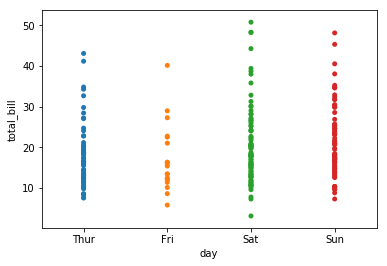

In [44]:
#striplots
sns.stripplot(x='day',y='total_bill', data=tips)

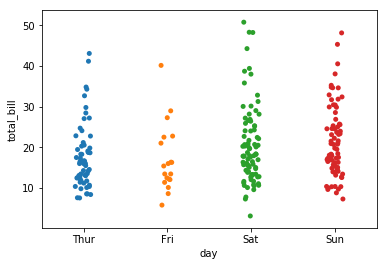

In [45]:
#add random noise to separate points using jitter, see density a little better
sns.stripplot(x='day',y='total_bill', data=tips, jitter=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


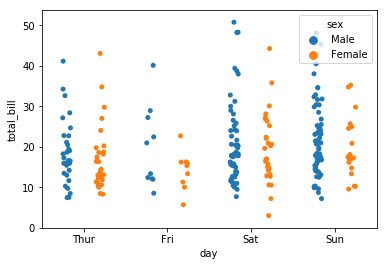

In [46]:
sns.stripplot(x='day',y='total_bill', data=tips, jitter=True,hue='sex',split=True)

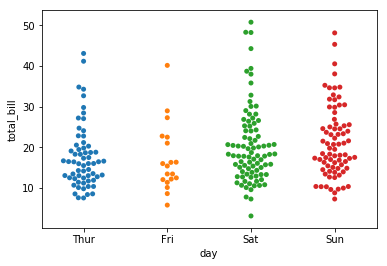

In [48]:
#combine strip plot and violin plot to create a swarm plot. Shows all the individual data points themselves
sns.swarmplot(x='day',y='total_bill', data=tips)

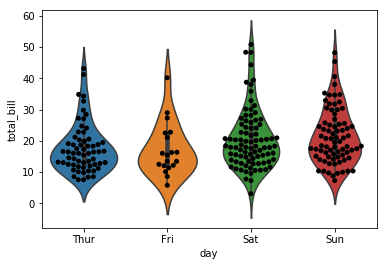

In [50]:
#combo of both-useful for EDA but not presentation. Stick to box and bar plots for communication.
sns.violinplot(x='day',y='total_bill', data=tips)
sns.swarmplot(x='day',y='total_bill', data=tips,color='black')

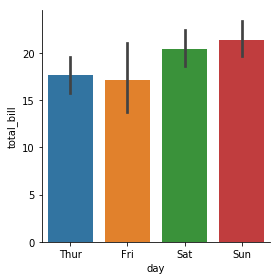

In [51]:
#factor plot-general form of all these plots. Use the kind category to call on type of plot
sns.factorplot(x='day',y='total_bill', data=tips,kind='bar')

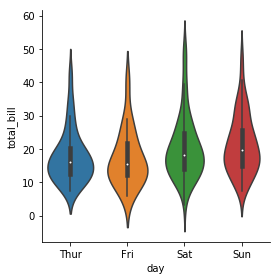

In [52]:
sns.factorplot(x='day',y='total_bill', data=tips,kind='violin')

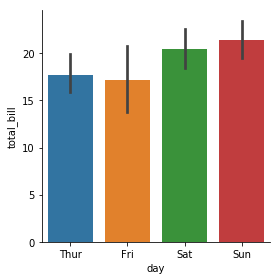

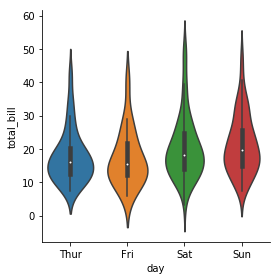

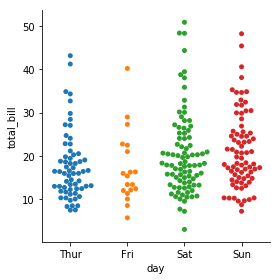

In [53]:
sns.factorplot(x='day',y='total_bill', data=tips,kind='bar')
sns.factorplot(x='day',y='total_bill', data=tips,kind='violin')
sns.factorplot(x='day',y='total_bill', data=tips,kind='swarm')